In [2]:
import pandas as pd

## Load in selected features and labels from last rolling data model

In [3]:
selected_features_directory = r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_selected_features.h5'
y_directory = r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_labels.h5'
selected_features = pd.read_hdf(selected_features_directory,key='f')
y = pd.read_hdf(y_directory,key='y')

## Fitting random forest classifier and finding most important features

In [6]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline

rf_clf = make_pipeline(
    RandomUnderSampler(random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=2),
)


In [7]:
from sklearn.model_selection import cross_val_predict

cv_predict_result = cross_val_predict(rf_clf, selected_features, y["label_shifted"].to_numpy())

In [13]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y["label_shifted"].to_numpy(),cv_predict_result)

0.5957811283115145

In [15]:
cv_result = cross_validate(rf_clf, selected_features, y["label_shifted"].to_numpy(), scoring = ["accuracy", "balanced_accuracy"])
cv_result["test_accuracy"].mean()
cv_result["test_balanced_accuracy"].mean()

0.7561894344031657

In [17]:
rf_clf.fit(selected_features, y["label_shifted"].to_numpy())
importance = pd.Series(rf_clf.named_steps['randomforestclassifier'].feature_importances_,
                       index = selected_features.columns).sort_values(ascending = False)

## This code plots the 10 most important features

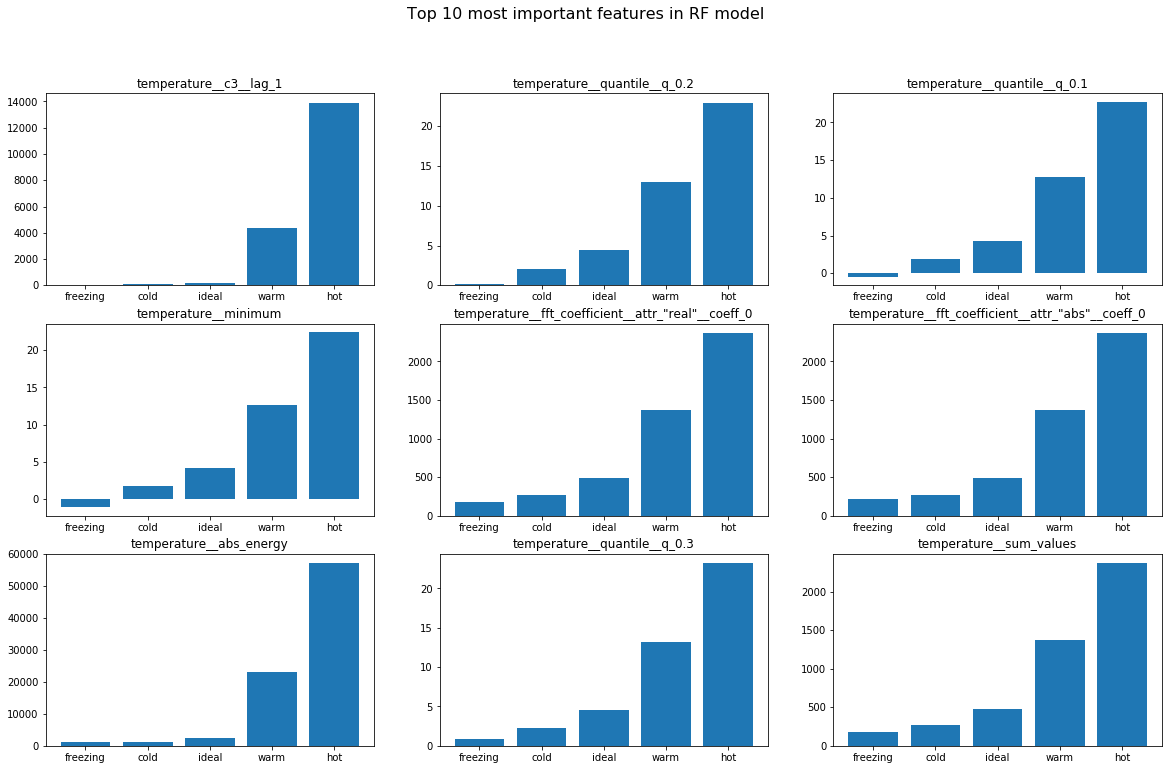

In [60]:
import matplotlib.pyplot as plt
xy_matrix = selected_features
xy_matrix["label"] = y["label_shifted"]
#xy_matrix.groupby("label")[importance.index[0]].mean().plot(kind='bar', title = importance.index[0])
fig,axs = plt.subplots(3,3)
fig.set_size_inches(20,12)
fig.suptitle("Top 10 most important features in RF model",fontsize=16)
imp = 0
for i in range(3):
    for j in range(3):
        axs[i,j].bar(xy_matrix.groupby("label")[importance.index[imp]].mean().sort_values().index,
                     xy_matrix.groupby("label")[importance.index[imp]].mean().sort_values().values)
        axs[i,j].set_title(importance.index[imp])
        imp +=1

## This code plots 5 hour intervals with closest fft_coefficient to the mean of the labelled group

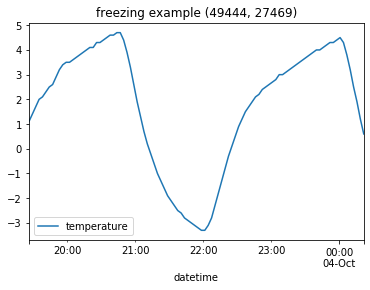

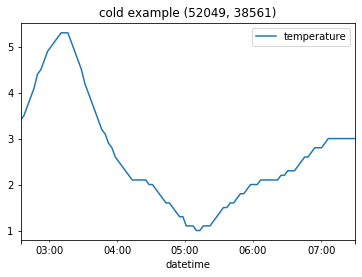

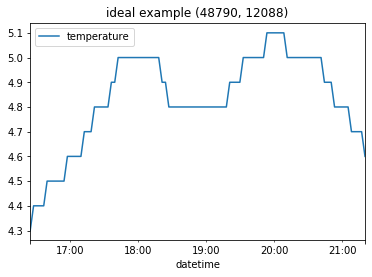

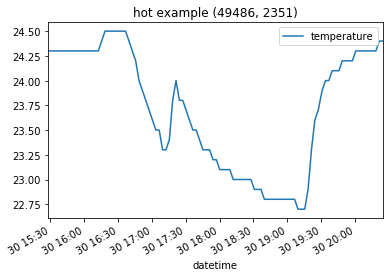

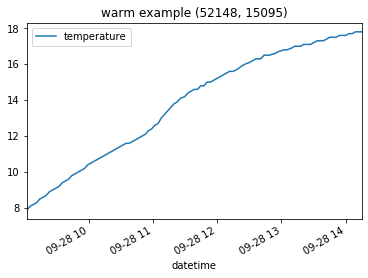

In [62]:
freezing_index = xy_matrix.loc[xy_matrix["label"] == 'freezing', importance.index[4]].sub(xy_matrix.groupby("label")[importance.index[4]].mean()['freezing']).abs().idxmin()
temp_df_rolled_freezing = pd.read_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_device_' + str(freezing_index[0]) + '.h5', key='df')
temp_df_rolled_freezing[temp_df_rolled_freezing["id"] == freezing_index].plot(x='datetime',y='temperature', title = 'freezing example ' + str(freezing_index))


cold_index = xy_matrix.loc[xy_matrix["label"] == 'cold', importance.index[4]].sub(xy_matrix.groupby("label")[importance.index[4]].mean()['cold']).abs().idxmin()
temp_df_rolled_cold = pd.read_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_device_' + str(cold_index[0]) + '.h5', key='df')
temp_df_rolled_cold[temp_df_rolled_cold["id"] == cold_index].plot(x='datetime',y='temperature', title = 'cold example ' + str(cold_index))


ideal_index = xy_matrix.loc[xy_matrix["label"] == 'ideal', importance.index[4]].sub(xy_matrix.groupby("label")[importance.index[4]].mean()['ideal']).abs().idxmin()
temp_df_rolled_ideal = pd.read_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_device_' + str(ideal_index[0]) + '.h5', key='df')
temp_df_rolled_ideal[temp_df_rolled_ideal["id"] == ideal_index].plot(x='datetime',y='temperature', title = 'ideal example ' + str(ideal_index) )


hot_index = xy_matrix.loc[xy_matrix["label"] == 'hot', importance.index[4]].sub(xy_matrix.groupby("label")[importance.index[4]].mean()['hot']).abs().idxmin()
temp_df_rolled_hot = pd.read_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_device_' + str(hot_index[0]) + '.h5', key='df')
temp_df_rolled_hot[temp_df_rolled_hot["id"] == hot_index].plot(x='datetime',y='temperature', title = 'hot example ' + str(hot_index))


warm_index = xy_matrix.loc[xy_matrix["label"] == 'warm', importance.index[4]].sub(xy_matrix.groupby("label")[importance.index[4]].mean()['warm']).abs().idxmin()
temp_df_rolled_warm = pd.read_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_device_' + str(warm_index[0]) + '.h5', key='df')
temp_df_rolled_warm[temp_df_rolled_warm["id"] == warm_index].plot(x='datetime',y='temperature',title = 'warm example ' + str(warm_index))

In [91]:
def plot_roll_id(roll_id):
    temp_df = pd.read_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_device_' + str(roll_id[0]) + '.h5', key='df')
    temp_df[temp_df["id"] == roll_id].plot(x='datetime',y='temperature',title = 'example ' + str(roll_id))

In [90]:
y[(y.label == 'ideal') & (y.label_shifted != 'ideal')]


seq_id  label label_shifted
roll_id                                   
(59497, 99)        99  ideal          warm
(59497, 100)      100  ideal          warm
(59497, 101)      101  ideal          warm
(59497, 102)      102  ideal          warm
(59497, 203)      203  ideal      freezing
...               ...    ...           ...
(59519, 1879)    1879  ideal          cold
(59519, 1880)    1880  ideal          cold
(59519, 1881)    1881  ideal          cold
(59519, 1882)    1882  ideal          cold
(59519, 1883)    1883  ideal          cold

[16345 rows x 3 columns]

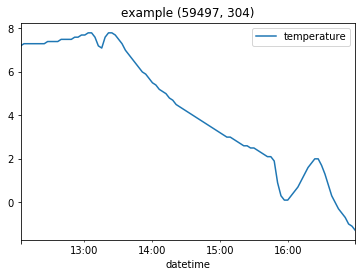

In [101]:
plot_roll_id((59497, 304))